***Support Vector Machines***
    Using SVM with Python to predict whether a breast cancer tumor is malignant or benign. Exercise uses numpy, pandas, and scikitlearn and utilizes train test split, SVM, SVC,  and GridSearch to identify the best parameters for prediction.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
# 1 point
# import and load the breast cancer dataset 
from sklearn.datasets import load_breast_cancer
# output a variable where the data is loaded straight from sklearn
cancer = 0

# YOUR CODE HERE
# raise NotImplementedError()
cancer = load_breast_cancer()

In [3]:
assert cancer.data.shape == (569,30)

In [4]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [5]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
# 1 point
#load the data from the dataset into a pd df
#output a dataframe with the data of the dataset and the column names as feature names
#IT SHOULD NOT INCLUDE THE TARGET 
df_feat = 0
# YOUR CODE HERE
df_feat = pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [7]:
df_feat.mean()

mean radius                 14.127292
mean texture                19.289649
mean perimeter              91.969033
mean area                  654.889104
mean smoothness              0.096360
mean compactness             0.104341
mean concavity               0.088799
mean concave points          0.048919
mean symmetry                0.181162
mean fractal dimension       0.062798
radius error                 0.405172
texture error                1.216853
perimeter error              2.866059
area error                  40.337079
smoothness error             0.007041
compactness error            0.025478
concavity error              0.031894
concave points error         0.011796
symmetry error               0.020542
fractal dimension error      0.003795
worst radius                16.269190
worst texture               25.677223
worst perimeter            107.261213
worst area                 880.583128
worst smoothness             0.132369
worst compactness            0.254265
worst concav

In [8]:
b = True
for i in cancer['feature_names']:
    if df_feat[i].shape != (569,):
        b = False
        break
assert b

In [9]:
# 1 point
# create a dataframe with all the targets and the column name your be 'Cancer'
# output a single column dataframe
df_target = 0
# YOUR CODE HERE
df_target = pd.DataFrame(cancer.target, columns=["Cancer"])
# raise NotImplementedError()

In [10]:
assert df_target['Cancer'].shape == (569,)

In [11]:
X = cancer.data
y = cancer.target

# Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
#1 point
# get the train test split, tested with random state 0 and test_size 0.2
# import if needed
# all the subsets should be numpy arrays
# TIP carefull with the shape of the Y
# YOUR CODE HERE
# raise NotImplementedError()
from sklearn.model_selection import train_test_split, cross_val_score
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
assert x_train.shape == (455,30)
assert x_test.shape == (114,30)
assert y_train.shape == (455,)
assert y_test.shape == (114,)

In [14]:
# 2 points
#Train the support vector classifier
# import if needed
from sklearn import svm
clf = 0
# YOUR CODE HERE
# raise NotImplementedError()
clf = svm.SVC()
clf = clf.fit(x_train, y_train)

In [15]:
clf.support_vectors_.shape

(123, 30)

In [16]:
assert clf.support_vectors_.shape == (123,30)

In [17]:
# 3 points
# predict the testing data and get the accuracy
# import if needed
# output preds is the array with the predictions and acc is a float between 0 and 1
preds = 0
acc = 0
# YOUR CODE HERE
# raise NotImplementedError()
preds = clf.predict(x_test)
acc = (preds == y_test).mean()

In [18]:
acc

0.9298245614035088

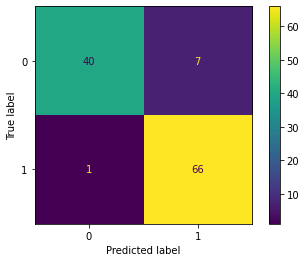

In [19]:
conf_mat = confusion_matrix(y_test, preds, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=clf.classes_)
disp.plot()

From the confusion matrix we can see that, out of 114 predicted samples, 106 samples were correctly predicted by the model whereas 8 samples were incorrectly predicted.

In [20]:
assert acc > 0.85
assert preds.shape == (114,)

***Everything is being classified into a single class! Use Grid Search to search for the best parameters! (Scikitlearn GridSearchCV)***


In [21]:
# 2 points
#Set parameters
# the parameters should be in a dict format
params = {'kernel': ['rbf', 'poly'],
          'C': [0.001, 0.01, 0.1, 1, 10, 100],
         }
# YOUR CODE HERE
# raise NotImplementedError()

In [22]:
assert len(params) == 2
assert len(params['kernel']) == 2

In [23]:
#Fit grid (Note to self: first it runs the same loop with cross-validation to find the best parameter combination. Once it has the best combination, it runs fit again on all data passed to fit (without cross-validation), to built a single new model using the best parameter setting.)
# 4 points
from sklearn.model_selection import GridSearchCV
# add an svm to the grid and train it
# the SVM should be an untrained one
# import if needed 
svc = 0
svc = svm.SVC()
grid_clf = 0
# YOUR CODE HERE
# raise NotImplementedError()
grid_clf = GridSearchCV(svc, params, scoring='accuracy', cv=5, verbose=1)
grid_clf.fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['rbf', 'poly']},
             scoring='accuracy', verbose=1)

In [24]:
grid_clf.best_params_

{'C': 100, 'kernel': 'rbf'}

In [25]:
grid_clf.best_params_.keys()

dict_keys(['C', 'kernel'])

In [26]:
dic = grid_clf.get_params(deep=False)
assert type(dic['estimator']) == type(svm.SVC()) 
assert dic['pre_dispatch'] == '2*n_jobs'

In [27]:
# 2 point
#Get in a list the best parameters of the grid
#output python list with the best parameters sorted
best_params = sorted(list(grid_clf.cv_results_.keys()))
# YOUR CODE HERE
# raise NotImplementedError()

In [28]:
best_params

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [29]:
assert best_params[0] == 'mean_fit_time'
assert best_params[1] == 'mean_score_time'
assert best_params[2] == 'mean_test_score'
assert best_params[3] == 'param_C'

In [30]:
# 5 points
# predict the testing set and get the accuracy
# accuracy as always will be between 0 and 1
preds = 0
acc = 0
# YOUR CODE HERE
# raise NotImplementedError()
optimized_clf = svm.SVC(kernel="rbf", C=100)
optimized_clf.fit(x_train, y_train)
preds = optimized_clf.predict(x_test)
acc = (preds == y_test).mean()
print("Accuracy:", acc)

Accuracy: 0.9473684210526315


In [31]:

assert acc > 0.92
assert preds[preds.argmax()] == 1
assert preds.shape == (114,)

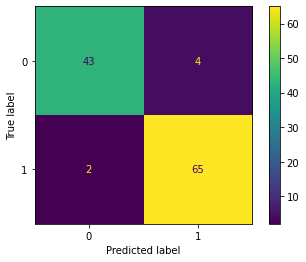

In [32]:
# 3 points
# get the confusion matrix
#import if needed
conf_mat = []
# YOUR CODE HERE
# raise NotImplementedError()
conf_mat = confusion_matrix(y_test, preds, labels=optimized_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=optimized_clf.classes_)
disp.plot()

From the confusion matrix we can see that, out of 114 predicted samples, 108 samples were correctly predicted by the model whereas 6 samples were incorrectly predicted.

In [33]:
assert conf_mat.shape == (2,2)
assert conf_mat[0][1] < 7
assert conf_mat[1][0] < 3


# Plotting the Results

In [34]:
train_accuracy_rbf = []
test_accuracy_rbf = []
train_accuracy_poly = []
test_accuracy_poly = []
#train_accuracy_linear = []
#test_accuracy_linear = []

for keys in params['kernel']:
    for values in params['C']:
        svc_clf = svm.SVC(kernel=keys, C=values)
        svc_clf = svc_clf.fit(x_train, y_train)
        svc_clf_train = svc_clf.predict(x_train)
        svc_clf_prediction = svc_clf.predict(x_test)
        train_accuracy = (svc_clf_train == y_train).mean() * 100
        test_accuracy = (svc_clf_prediction == y_test).mean() * 100
        if keys == 'rbf':
            train_accuracy_rbf.append(train_accuracy)
            test_accuracy_rbf.append(test_accuracy)
        elif keys == 'poly':
            train_accuracy_poly.append(train_accuracy)
            test_accuracy_poly.append(test_accuracy)
#         elif keys == 'linear':
#             train_accuracy_linear.append(train_accuracy)
#             test_accuracy_linear.append(test_accuracy)

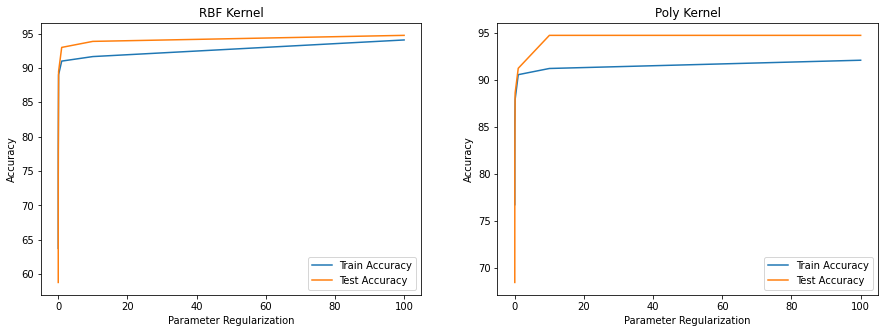

In [35]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
axs[0].set_title("RBF Kernel")
axs[0].plot(params["C"], train_accuracy_rbf, label="Train Accuracy")
axs[0].plot(params["C"], test_accuracy_rbf, label="Test Accuracy")
axs[0].legend(loc="lower right")
axs[1].set_title("Poly Kernel")
axs[1].plot(params["C"], train_accuracy_poly, label="Train Accuracy")
axs[1].plot(params["C"], test_accuracy_poly, label="Test Accuracy")
axs[1].legend(loc="lower right")
# axs[2].set_title("Linear Kernel")
# axs[2].plot(params["C"], train_accuracy_linear, label="Train Accuracy")
# axs[2].plot(params["C"], test_accuracy_linear, label="Test Accuracy")
# axs[2].legend(loc="lower right")
for ax in axs.flat:
    ax.set(xlabel='Parameter Regularization', ylabel='Accuracy')

# Discussion of Results

The accuracy of the SVM model without hyperparameter tuning was 92.9%. The kernel type used in this model was 'rbf' and the regularization parameter 'C' was set to default which is 1. However, with hyperparameter tuning the accuracy of the model almost had 2% increase with the accuracy of 94.7%. The best parameters for the model was {'C': 100, 'kernel': 'rbf'} which can be obtained using GridSearchCV.    